# FORECASTING UNEMPLOYMENT RATE 

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.collections import PolyCollection
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', -1)

In [4]:
df1=pd.read_csv('final.csv')

In [5]:
df1.dtypes

S.NO      int64  
DATE      object 
UNRATE    float64
dtype: object

In [6]:
df1.shape

(387, 3)

In [7]:
df1.head()

,S.NO,DATE,UNRATE
0,1,01/01/1990,5.4
1,2,02/01/1990,5.3
2,3,03/01/1990,5.2
3,4,04/01/1990,5.4
4,5,05/01/1990,5.4


In [8]:
df1.tail()

,S.NO,DATE,UNRATE
382,383,11/01/2021,4.2
383,384,12/01/2021,3.9
384,385,01/01/2022,4.0
385,386,02/01/2022,3.8
386,387,03/01/2022,3.6


**Converting Date to (yyyy-mm-dd) format**

In [9]:
df1['DATE']=pd.to_datetime(df1['DATE'])

In [10]:

df1.head()

,S.NO,DATE,UNRATE
0,1,1990-01-01,5.4
1,2,1990-02-01,5.3
2,3,1990-03-01,5.2
3,4,1990-04-01,5.4
4,5,1990-05-01,5.4


In [11]:
df1.dtypes

S.NO      int64         
DATE      datetime64[ns]
UNRATE    float64       
dtype: object

In [12]:
df1.head()

,S.NO,DATE,UNRATE
0,1,1990-01-01,5.4
1,2,1990-02-01,5.3
2,3,1990-03-01,5.2
3,4,1990-04-01,5.4
4,5,1990-05-01,5.4


**Set DATE as INDEX**

In [13]:
df1.set_index('DATE',inplace=True)
df1.head()

,S.NO,UNRATE
DATE,,
1990-01-01,1,5.4
1990-02-01,2,5.3
1990-03-01,3,5.2
1990-04-01,4,5.4
1990-05-01,5,5.4


**Droping S.No Coloumn**

In [14]:
df1.drop('S.NO', axis=1, inplace=True)

In [15]:
df1.head(), df1.tail()

(            UNRATE
 DATE              
 1990-01-01  5.4   
 1990-02-01  5.3   
 1990-03-01  5.2   
 1990-04-01  5.4   
 1990-05-01  5.4   ,
             UNRATE
 DATE              
 2021-11-01  4.2   
 2021-12-01  3.9   
 2022-01-01  4.0   
 2022-02-01  3.8   
 2022-03-01  3.6   )

**DATA VISUALIZATION**

<AxesSubplot:xlabel='DATE'>

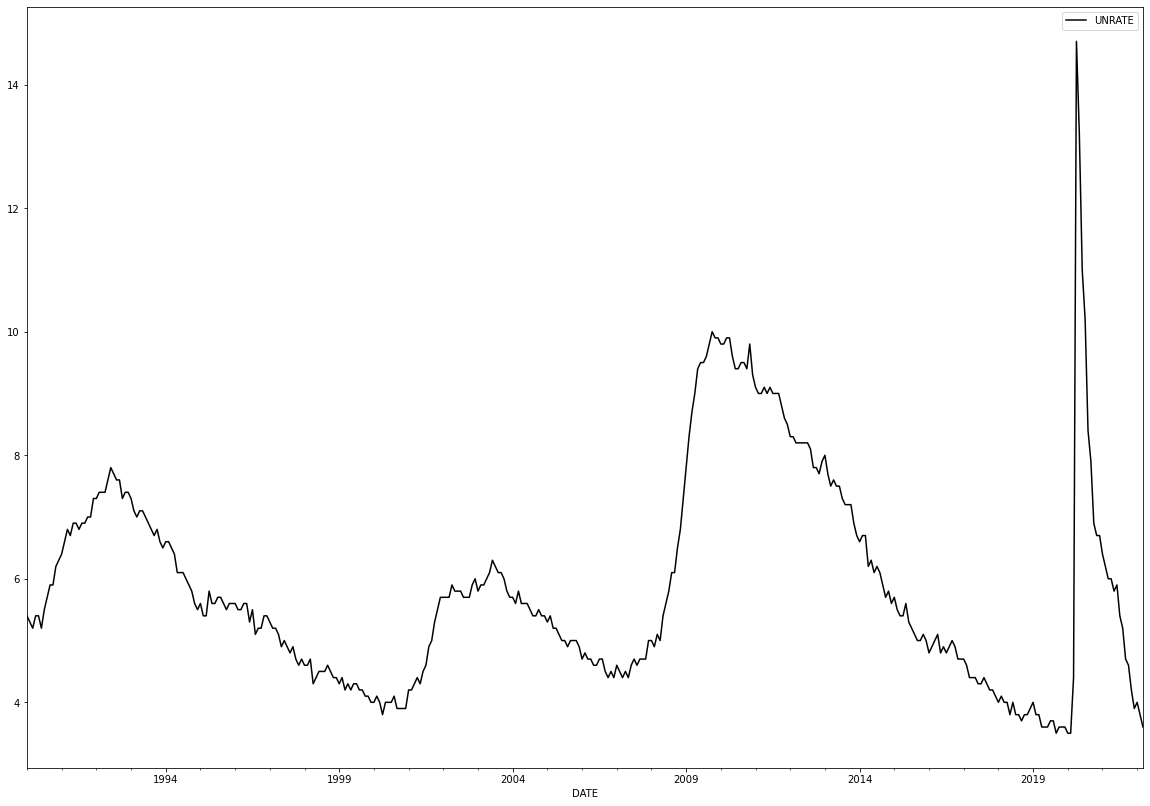

In [16]:
df1.plot(color='black',figsize=(20,14))

**Simple Moving Average**

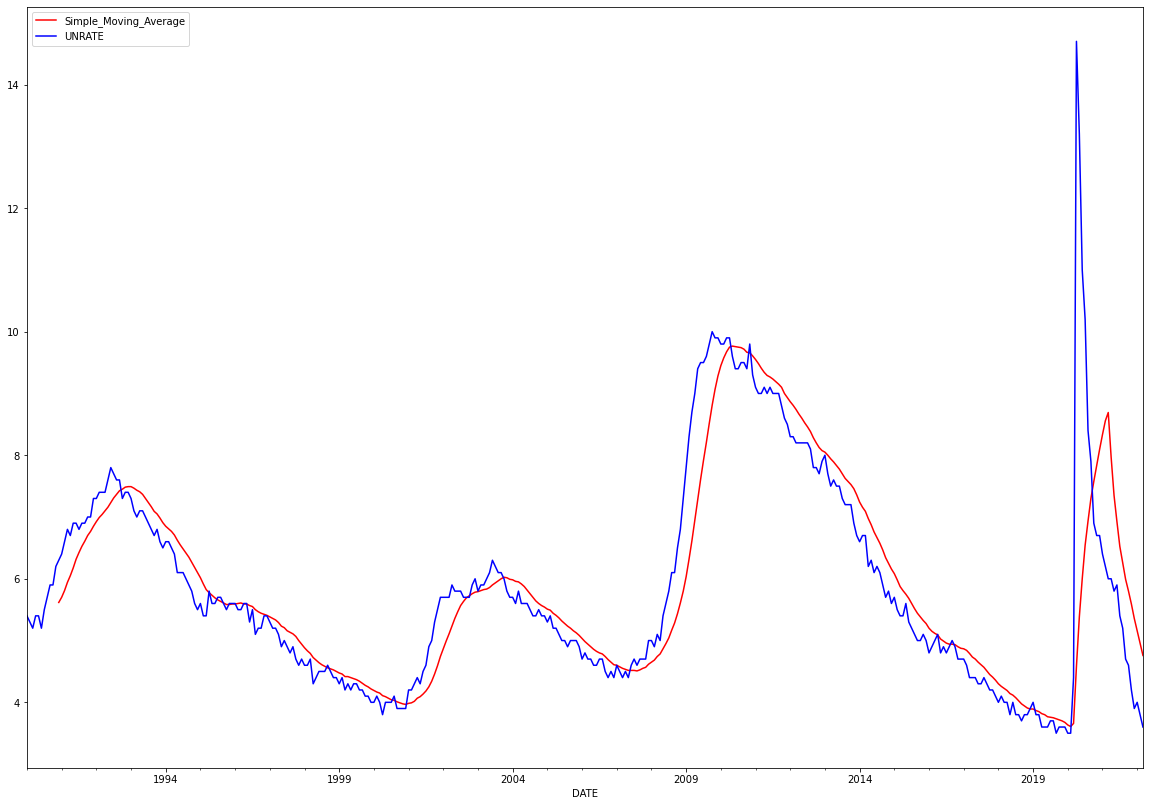

In [17]:
df1['UNRATE'].rolling(12).mean().plot(label='Simple_Moving_Average',figsize=(20,14),color="red")
df1["UNRATE"].plot(color="blue")
plt.legend()

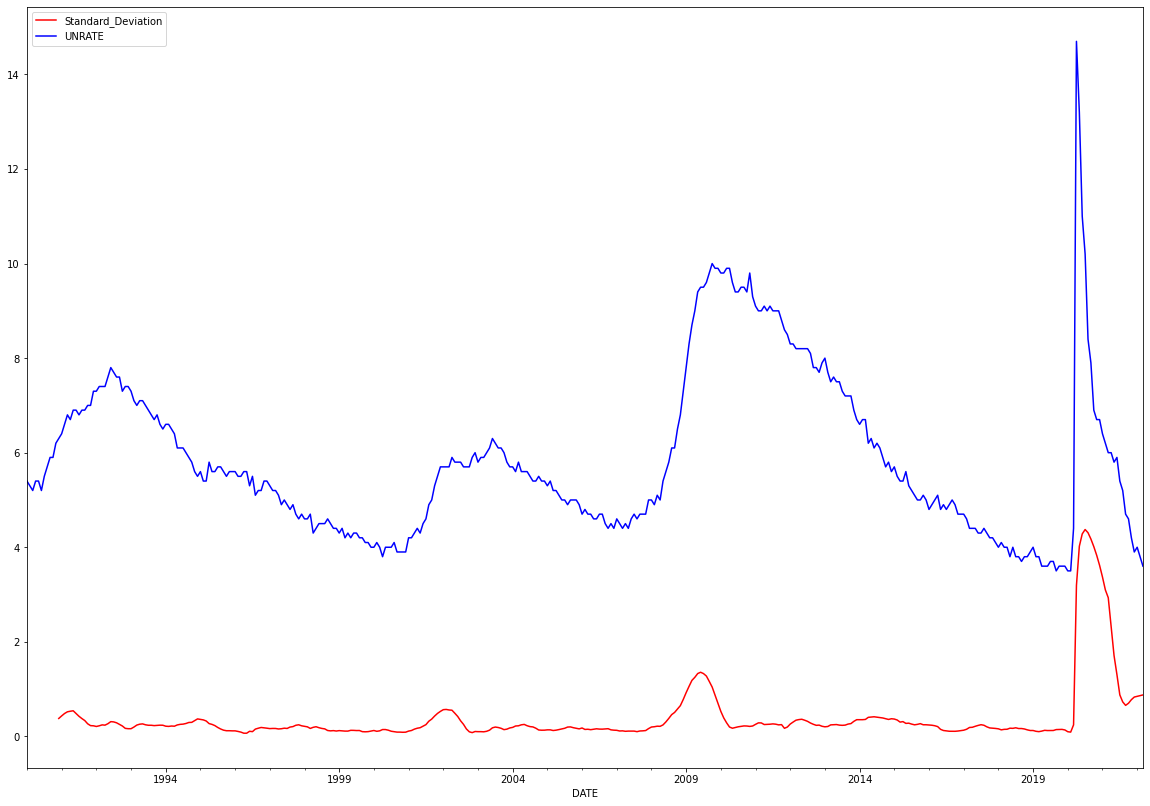

In [18]:
df1['UNRATE'].rolling(12).std().plot(label='Standard_Deviation',figsize=(20,14),color="red")
df1["UNRATE"].plot(color="blue")
plt.legend()

**DECOMPOSITION**

**Decomposition of time series data into trend, seasonality and residual component :**

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose       

In [24]:

import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from matplotlib.figure import Figure
from mpl_toolkits.axisartist.axislines import Subplot

de=seasonal_decompose(df1['UNRATE'])

fig.set_size_inches(16,10)

fig, axes= plt.subplots(4, 1 ,sharex=True)

de.observed.plot(ax=axes[0],legend=False,color="red",figsize=(20,14))
axes[0].set_ylabel('UNRATE')

de.seasonal.plot(ax=axes[2],legend=False,figsize=(20,14))
axes[2].set_ylabel('Seasonality')

de.trend.plot(ax=axes[1],legend=False,color="green",figsize=(20,14))
axes[1].set_ylabel('Trend')

de.resid.plot(ax=axes[3],legend=False,color="k",figsize=(20,14))
axes[3].set_ylabel('Residual')

#fig = de.figure()
#plt.show()

NameError: name 'fig' is not defined

**CHECKING  STATIONARITY**


**Converting the data into the stationary form:**

As we can see our data is not stationary hence we need to change this data into stationary form. For this we will first perform the Dickey-Fuller test.

**Dickey-Fuller test:**
This test is also known as a unit root test. The unit root test defines how strongly a time series is defined by a trend. In this test the Null Hypothesis is that the time series can be represented by a unit root which means that it has some time dependent component. The alterative hypothesis is assumed as the time series is stationary.

**Null Hypothesis (H0):**
If it is accepted it denotes that our time series has a unit root. It means that the series is non- stationary .It has some dependent structure.

**Alternative hypothesis(Ha):**
If the null hypothesis is rejected it denotes that the time series has no unit root. Our time series is stationary.

We will interpret is using the p-value of the test. p-value which is below the (usually 5% ) we reject the null hypothesis.

•	**p-value > 0.05: Fail to reject the null hypothesis (H0), the data is non-stationary.**

•	**p-value <= 0.05: Reject the null hypothesis (H0), the data is stationary.**




In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
fuller_t=adfuller(df1['UNRATE'])
fuller_t

(-3.212707588660369,
 0.01926079715885687,
 0,
 386,
 {'1%': -3.447405233596701,
  '5%': -2.8690569369014605,
  '10%': -2.5707743450830893},
 651.257877961659)

In [27]:
def test_p (data):
    fuller_t=adfuller(data)
    print("P_Value : ",fuller_t[1])
    if fuller_t[1]<=0.05:
        print("REJECT Null Hypothesis (Data is Stationary)")
    else:
        print("ACCEPT Null Hypothesis (Data is not Stationary)")

In [28]:
test_p(df1["UNRATE"])

P_Value :  0.01926079715885687
REJECT Null Hypothesis (Data is Stationary)


**Differencing**

Difference denotes the change of the time series from one period to the other. We will calculate the first, second and third difference and for each p value is checked.

<AxesSubplot:xlabel='DATE'>

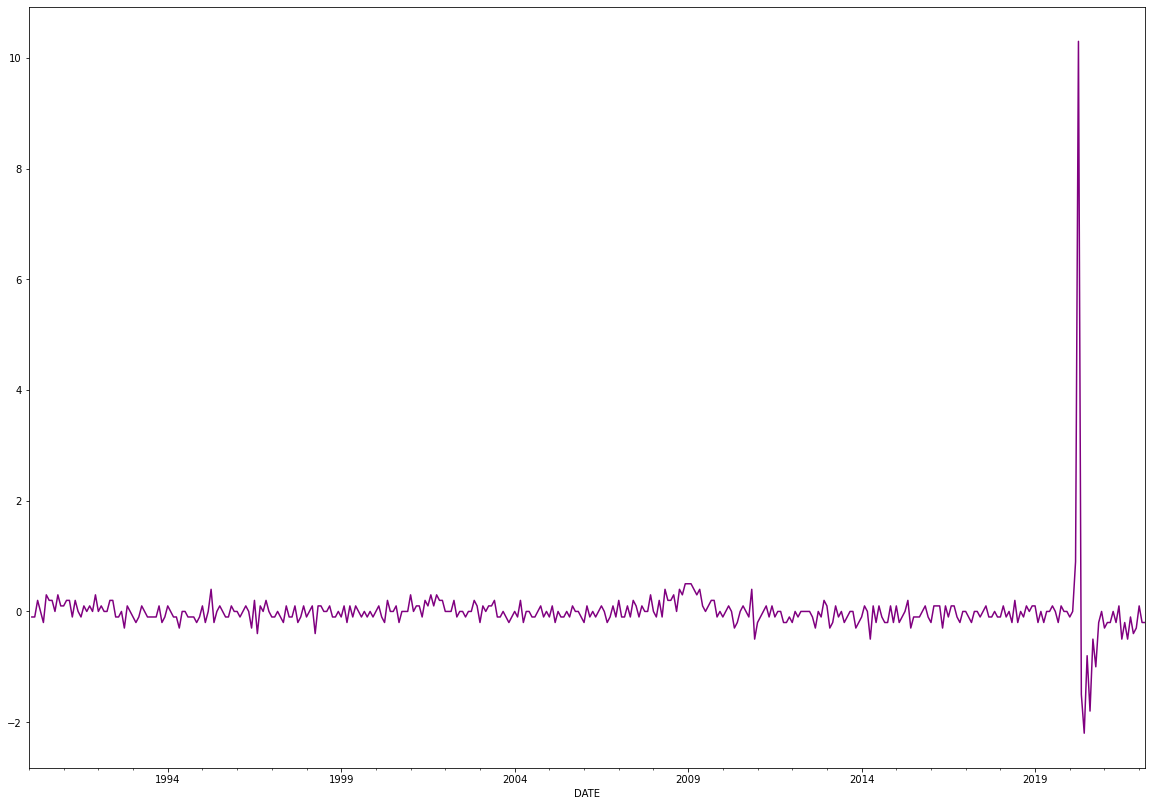

In [29]:
df1["diff 1"]=df1["UNRATE"]-df1["UNRATE"].shift(1)
df1["diff 1"].plot(color='purple',figsize=(20,14))

In [30]:
test_p(df1['diff 1'].dropna())

P_Value :  3.0223822845084606e-21
REJECT Null Hypothesis (Data is Stationary)


<AxesSubplot:xlabel='DATE'>

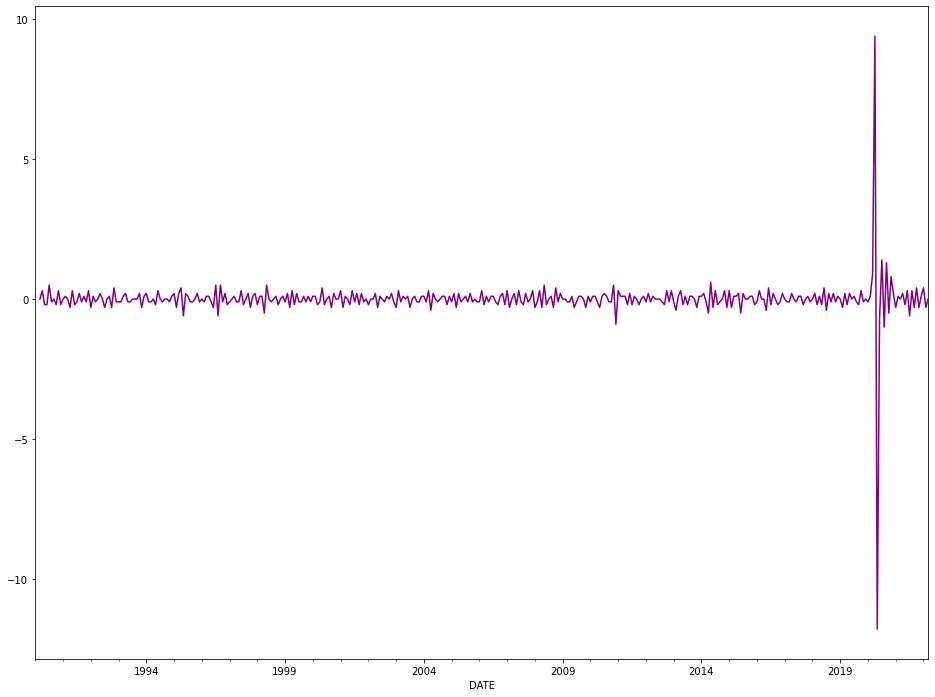

In [31]:
df1["diff 2"]=df1["diff 1"]-df1["diff 1"].shift(1)
df1["diff 2"].plot(color='purple',figsize=(16,12))

In [32]:
test_p(df1['diff 2'].dropna())

P_Value :  1.0362680067205874e-15
REJECT Null Hypothesis (Data is Stationary)


<AxesSubplot:xlabel='DATE'>

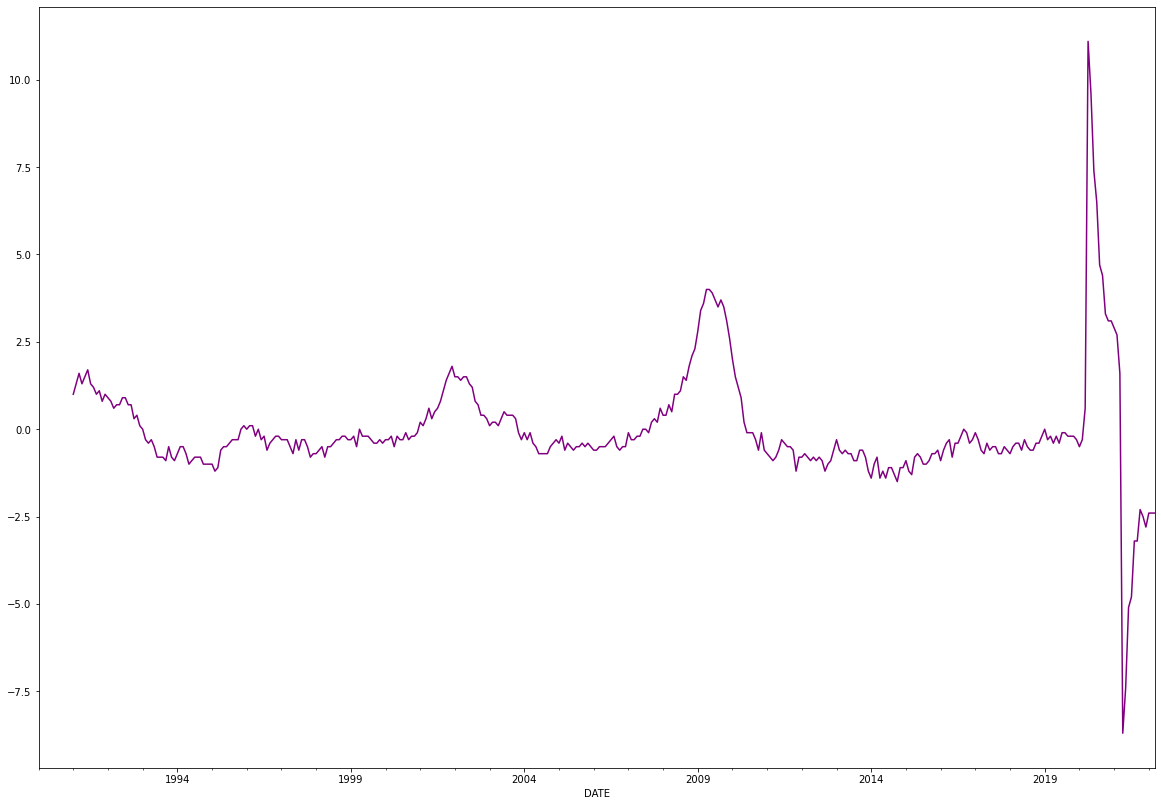

In [33]:
df1["Seasonal_difference"]=df1["UNRATE"]-df1["UNRATE"].shift(12)
df1["Seasonal_difference"].plot(color='purple',figsize=(20,14))

In [474]:
test_p(df1['Seasonal_difference'].dropna())

P_Value :  0.011054920565618855
REJECT Null Hypothesis (Data is Stationary)


**Auto-Correlation and Partial Auto-Correlation**

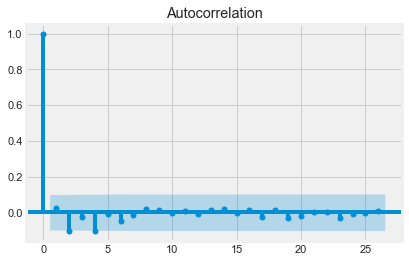

In [475]:

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
first_diff = plot_acf(df1['diff 1'].dropna())

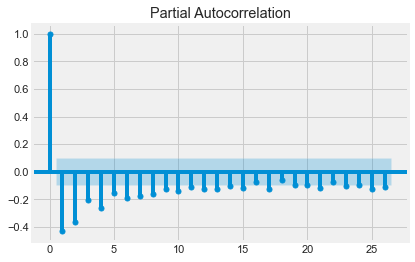

In [476]:
sec_diff = plot_pacf(df1['diff 2'].dropna())

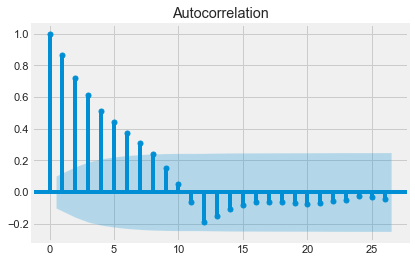

In [477]:
acrr = plot_acf(df1['Seasonal_difference'].dropna())


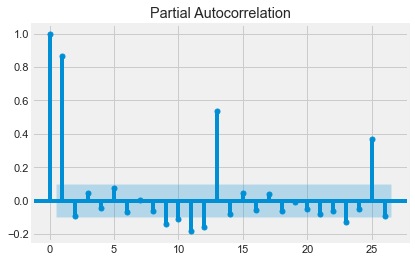

In [478]:
pacrr = plot_pacf(df1['Seasonal_difference'].dropna())

**Exponential Smoothing**

In [570]:
from statsmodels.tsa.api import SimpleExpSmoothing , Holt

In [559]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [561]:
import plotly.express as px
fig = px.line(df1.UNRATE)
fig.show()

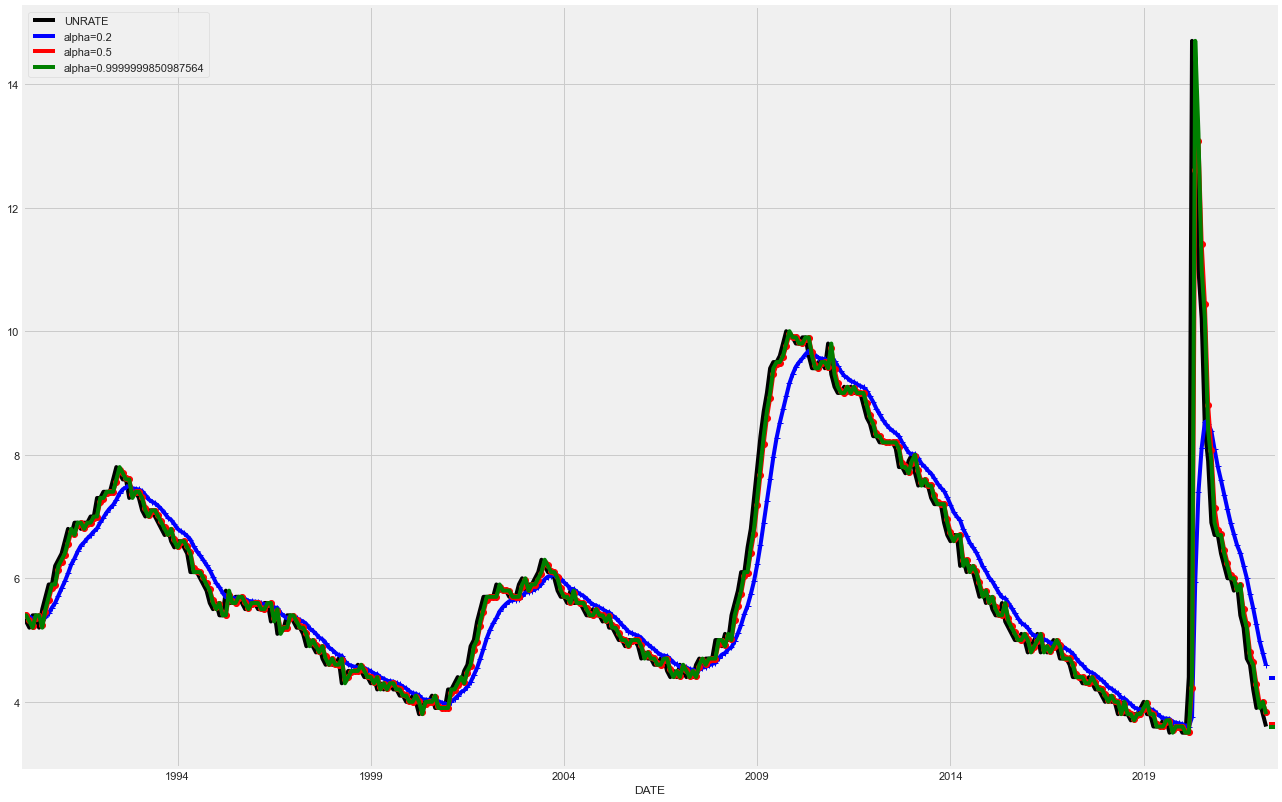

In [573]:

ins= SimpleExpSmoothing(df1.UNRATE).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')


ins2 = SimpleExpSmoothing(df1.UNRATE).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.5')
                                    
ins3 = SimpleExpSmoothing(df1.UNRATE).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])


ax = df1.UNRATE.plot(color='black', figsize=(20,14), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(ax=ax, color='green')

plt.show()

**ARIMA-MODEL**

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

An ARIMA model is characterized by 3 terms: p, d, q

where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. More on that once we finish ARIMA.



**GRID SEARCH ARIMA**

Applying Grid Search ARIMA for evaluating best value of p,d,q using certain defined combinations of p,d,q.

Result will be best model.

In [325]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df1.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=2.042
ARIMA(0, 0, 1) RMSE=1.394
ARIMA(0, 0, 2) RMSE=1.350
ARIMA(0, 1, 0) RMSE=0.963
ARIMA(0, 1, 1) RMSE=1.106
ARIMA(0, 1, 2) RMSE=1.247
ARIMA(0, 2, 0) RMSE=1.349
ARIMA(0, 2, 1) RMSE=1.398
ARIMA(0, 2, 2) RMSE=1.488
ARIMA(1, 0, 0) RMSE=0.951
ARIMA(1, 0, 1) RMSE=1.083
ARIMA(1, 0, 2) RMSE=1.218
ARIMA(1, 1, 0) RMSE=1.344
ARIMA(1, 1, 1) RMSE=1.359
ARIMA(1, 1, 2) RMSE=1.432
ARIMA(1, 2, 0) RMSE=1.729
ARIMA(1, 2, 1) RMSE=1.492
ARIMA(1, 2, 2) RMSE=1.505
ARIMA(2, 0, 0) RMSE=1.298
ARIMA(2, 0, 1) RMSE=1.321
ARIMA(2, 0, 2) RMSE=1.373
ARIMA(2, 1, 0) RMSE=1.388
ARIMA(2, 1, 1) RMSE=1.375
ARIMA(2, 1, 2) RMSE=1.460
ARIMA(2, 2, 0) RMSE=1.855
ARIMA(2, 2, 1) RMSE=1.531
ARIMA(2, 2, 2) RMSE=1.508
ARIMA(4, 0, 0) RMSE=1.407
ARIMA(4, 0, 1) RMSE=1.389
ARIMA(4, 0, 2) RMSE=1.389
ARIMA(4, 1, 0) RMSE=1.508
ARIMA(4, 1, 1) RMSE=1.500
ARIMA(4, 1, 2) RMSE=1.443
ARIMA(4, 2, 0) RMSE=1.899
ARIMA(4, 2, 1) RMSE=1.599
ARIMA(4, 2, 2) RMSE=1.622
ARIMA(6, 0, 0) RMSE=1.481
ARIMA(6, 0, 1) RMSE=1.436
ARIMA(6, 0, 

**Using Best Parameters Build ARIMA**

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  387
Model:                     ARMA(1, 0)   Log Likelihood                -332.210
Method:                       css-mle   S.D. of innovations              0.569
Date:                Thu, 05 May 2022   AIC                            670.419
Time:                        05:46:43   BIC                            682.294
Sample:                    01-01-1990   HQIC                           675.128
                         - 03-01-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7713      0.491     11.763      0.000       4.810       6.733
ar.L1.UNRATE     0.9433      0.017     57.088      0.000       0.911       0.976
                                    Roots   

<AxesSubplot:xlabel='DATE'>

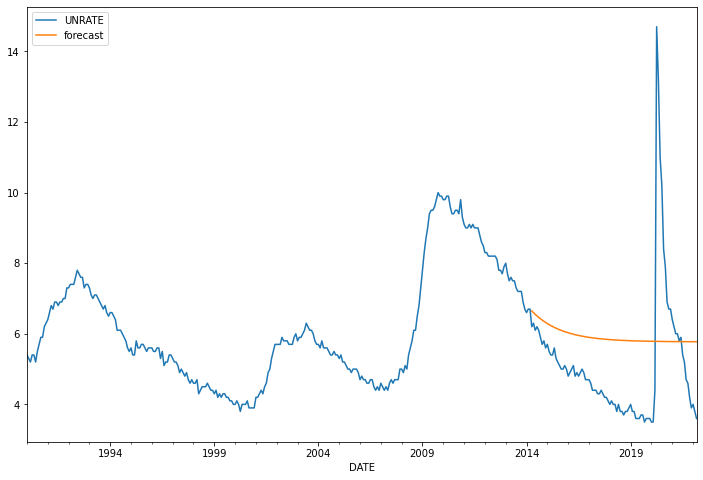

In [34]:
from statsmodels.tsa.arima_model import ARIMA

# 1,0,0 ARIMA Model
model4 = ARIMA(df1.UNRATE, order=(1,0,0))
model_fit1 = model4.fit(disp=0)
print(model_fit1.summary())
df1['forecast']=model_fit1.predict(start=291,end=387,dynamic=True)
df1[['UNRATE','forecast']].plot(figsize=(12,8))


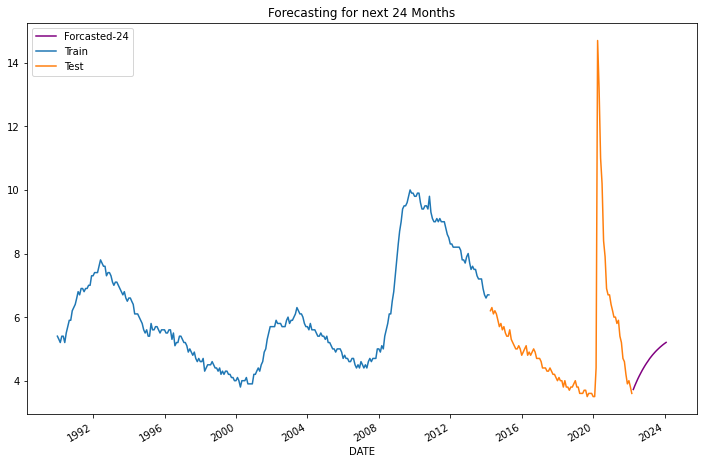

2022-04-01    3.723139
2022-05-01    3.839295
2022-06-01    3.948863
2022-07-01    4.052217
2022-08-01    4.149710
2022-09-01    4.241675
2022-10-01    4.328424
2022-11-01    4.410253
2022-12-01    4.487441
2023-01-01    4.560252
2023-02-01    4.628934
2023-03-01    4.693721
2023-04-01    4.754834
2023-05-01    4.812481
2023-06-01    4.866859
2023-07-01    4.918153
2023-08-01    4.966538
2023-09-01    5.012179
2023-10-01    5.055231
2023-11-01    5.095842
2023-12-01    5.134150
2024-01-01    5.170286
2024-02-01    5.204372
Freq: MS, dtype: float64

In [91]:
from datetime import datetime
st=datetime(2022,4,1)
en=datetime(2024,2,1)
pred1=model_fit1.predict(start=st,end=en)
plt.plot(pred1,label="Forcasted-24",color="purple")
train1.plot(label="Train",figsize=(12,8))
test1.plot(label="Test",figsize=(12,8))
plt.title("Forecasting for next 24 Months")
plt.legend()
plt.show()
pred1

**Splitting the Data into training and testing**

**Training_Size => 387*25/100 == 291**

**Testing_Size => 387-291 == 96**

In [35]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df1.UNRATE[:291]
test = df1.UNRATE[291:]

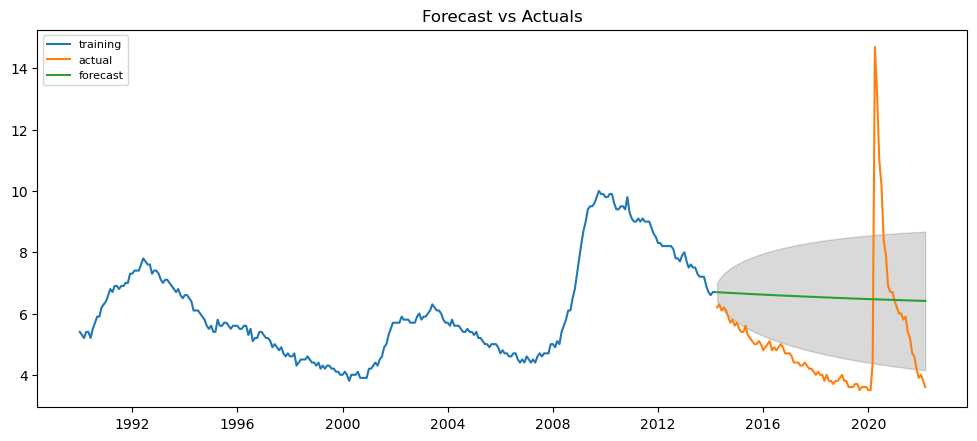

In [36]:
# Build Model
# model = ARIMA(train, order=(1,0,0))  
model = ARIMA(train, order=(1, 0, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(96, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**Model Evaluation**

In [37]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.4297708199434382,
 'me': 1.4176749861729423,
 'mae': 1.9928988397263563,
 'mpe': 0.3796331004295519,
 'rmse': 2.3229002491478656,
 'acf1': 0.8089965375568398,
 'corr': -0.035036693570489594,
 'minmax': 0.286149214537991}

**Plot residual errors**

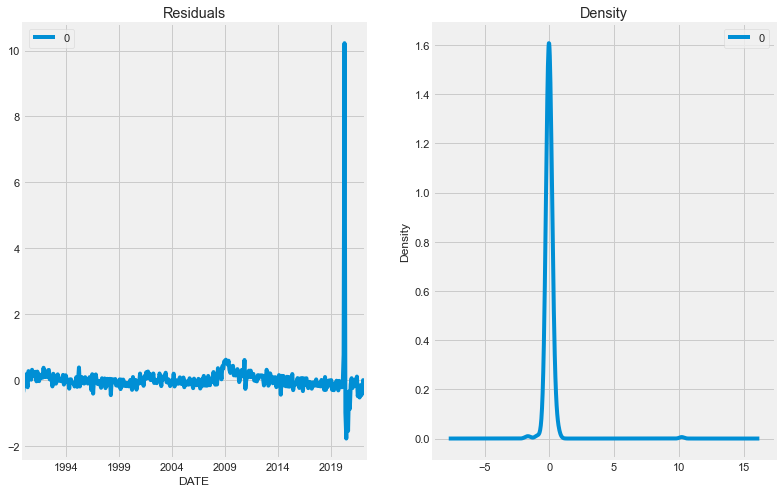

In [421]:

residuals = pd.DataFrame(model_fit1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0],figsize=(12,4))
residuals.plot(kind='kde', title='Density', ax=ax[1],figsize=(12,8))
plt.show()

In [47]:
train1 = df1.UNRATE[:291]
test1 = df1.UNRATE[291:]

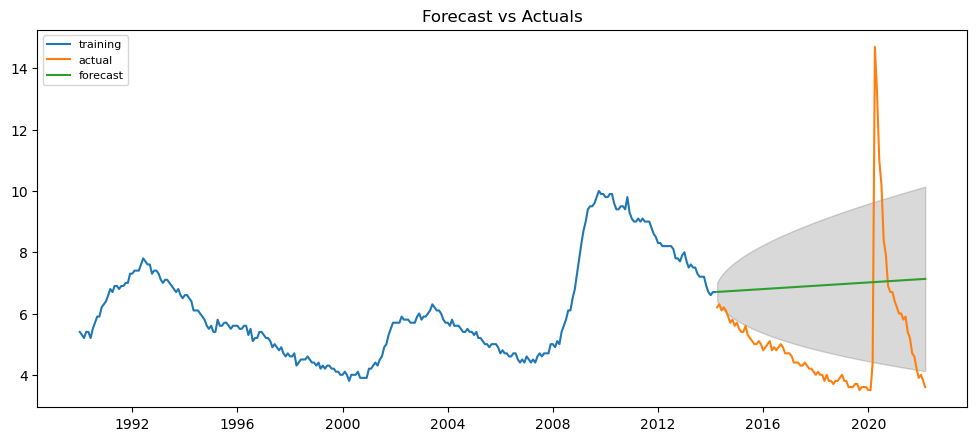

In [49]:
# Build Model
# model = ARIMA(train, order=(1,0,0))  
model = ARIMA(train1, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(96, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test1.index)
lower_series = pd.Series(conf[:, 0], index=test1.index)
upper_series = pd.Series(conf[:, 1], index=test1.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**Auto ARIMA**


auto_arima() with similar functionality.

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model.

In [50]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [51]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df1.UNRATE.dropna(), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

#print(model.summary())



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=675.374, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=675.671, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=677.413, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=677.343, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=673.696, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.346 seconds


**SARIMA**

**The plain ARIMA model has a problem. It does not support seasonality.**

* If the time series has defined seasonality, then we should go for Seasonal ARIMA model (in short SARIMA) which uses seasonal differencing.


* Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, we subtract the value from previous season.


* So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If the model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.


* We should set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. We should try to keep only either SAR or SMA terms if the model has seasonal components.


* Now, we will build a SARIMA model on same.

In [52]:
from statsmodels.tsa.arima_model import ARIMA
model=sm.tsa.statespace.SARIMAX(df1['UNRATE'],order=(0,1,0),seasonal_order=(1,1,1,12))

In [53]:
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               UNRATE   No. Observations:                  387
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -340.983
Date:                              Thu, 05 May 2022   AIC                            687.966
Time:                                      05:56:32   BIC                            699.739
Sample:                                  01-01-1990   HQIC                           692.640
                                       - 03-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2179      0.342     -0.638      0.524      -0.888       0.452
ma.S.L12      -0.7440      0.341     -2.180      0.029      -1.413      -0.075
sigma2         0.3494      0.003    134.087      0.000       0.344       0.355
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):            966619.90
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):              38.81   Skew:                            14.02
Prob(H) (two-sided):                  0.00   Kurtosis:                       250.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
res.resid

DATE
1990-01-01    5.400000
1990-02-01   -0.100000
1990-03-01   -0.100000
1990-04-01    0.200000
1990-05-01    0.000000
                ...   
2021-11-01   -0.373785
2021-12-01   -0.278991
2022-01-01    0.146652
2022-02-01   -0.152873
2022-03-01   -0.378856
Length: 387, dtype: float64

<AxesSubplot:xlabel='DATE'>

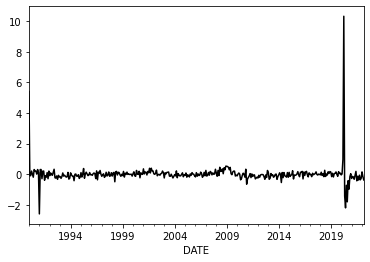

In [55]:
res.resid.plot(color='black')

<AxesSubplot:xlabel='DATE'>

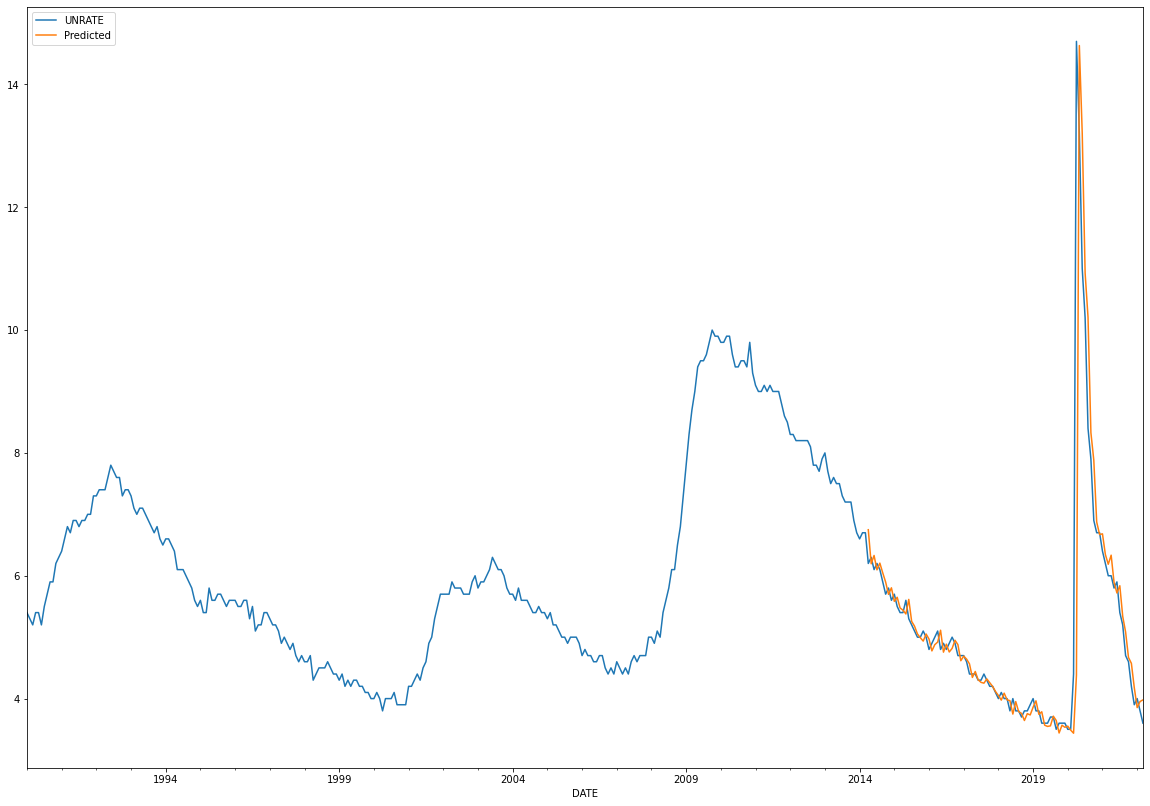

In [56]:
df1['Predicted']=res.predict(start=291,end=387)

df1[['UNRATE','Predicted']].plot(figsize=(20,14))

**Future Forecasting for next 24 months**

In [57]:
import pandas
from pandas.tseries.offsets import DateOffset
f_dates=[df1.index[-1] + DateOffset(months=m) for m in range(1,24)]

In [58]:
f_dates

[Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'),
 Timestamp('2023-04-01 00:00:00'),
 Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-06-01 00:00:00'),
 Timestamp('2023-07-01 00:00:00'),
 Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-09-01 00:00:00'),
 Timestamp('2023-10-01 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2024-02-01 00:00:00')]

In [59]:
forecast=pd.DataFrame(index=f_dates,columns=df1.columns)

In [60]:
forecast.head()

,UNRATE,diff 1,diff 2,Seasonal_difference,forecast,Predicted
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
forecast1=pd.concat([df1,forecast])

In [62]:
forecast1.tail(24)

,UNRATE,diff 1,diff 2,Seasonal_difference,forecast,Predicted
2022-03-01,3.6,-0.2,4.440892e-16,-2.4,5.774753,3.978856
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

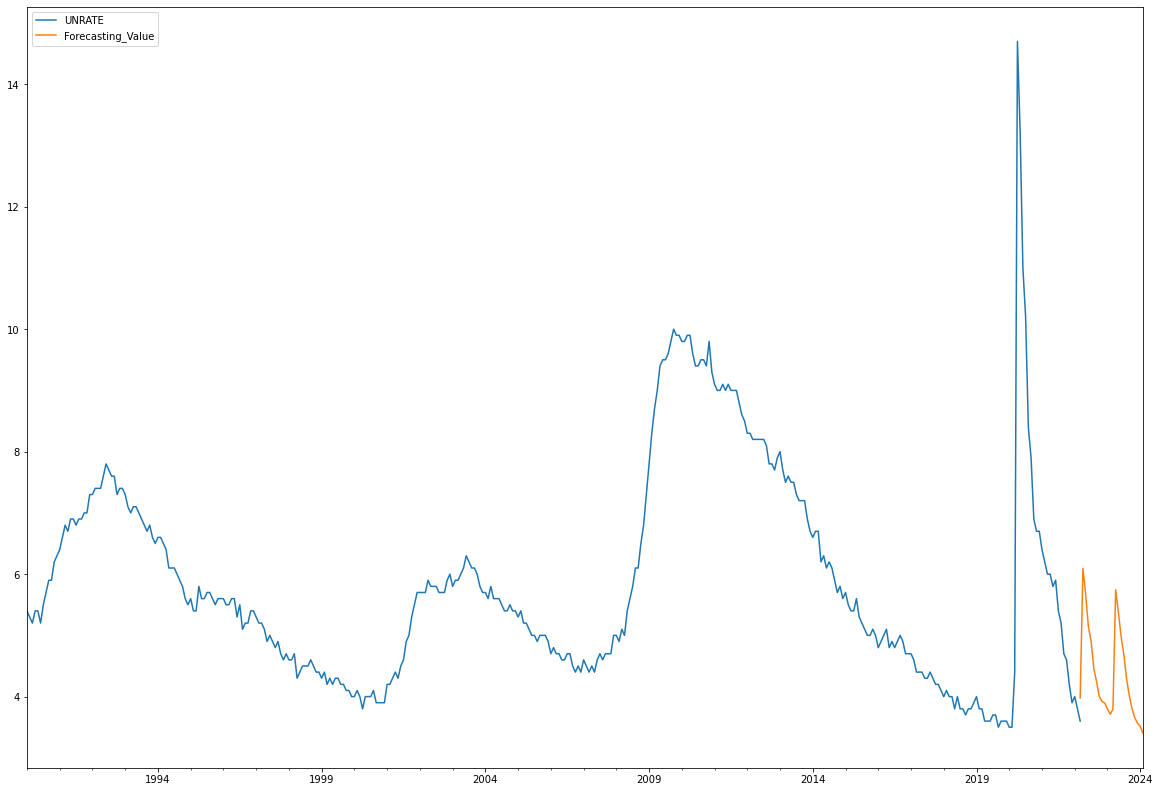

In [63]:
forecast1['Forecasting_Value']= res.predict(start=386,end=411)
forecast1[['UNRATE' ,'Forecasting_Value']].plot(figsize=(20,14))

In [72]:
forecast1.Forecasting_Value.tail(24)

2022-03-01    3.978856
2022-04-01    6.093451
2022-05-01    5.678759
2022-06-01    5.143199
2022-07-01    4.903395
2022-08-01    4.458265
2022-09-01    4.244301
2022-10-01    3.999956
2022-11-01    3.921643
2022-12-01    3.894589
2023-01-01    3.798320
2023-02-01    3.712063
2023-03-01    3.793945
2023-04-01    5.744105
2023-05-01    5.376192
2023-06-01    4.979112
2023-07-01    4.682614
2023-08-01    4.290895
2023-09-01    4.014607
2023-10-01    3.801714
2023-11-01    3.653309
2023-12-01    3.566783
2024-01-01    3.513279
2024-02-01    3.402239
Name: Forecasting_Value, dtype: float64

<AxesSubplot:>

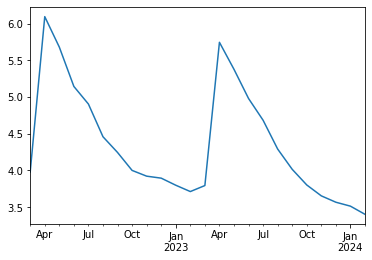

In [73]:
forecast1.Forecasting_Value.tail(24).plot()